# INTRODUCTION
- This is the dataset of Airline and here I are researching on it.

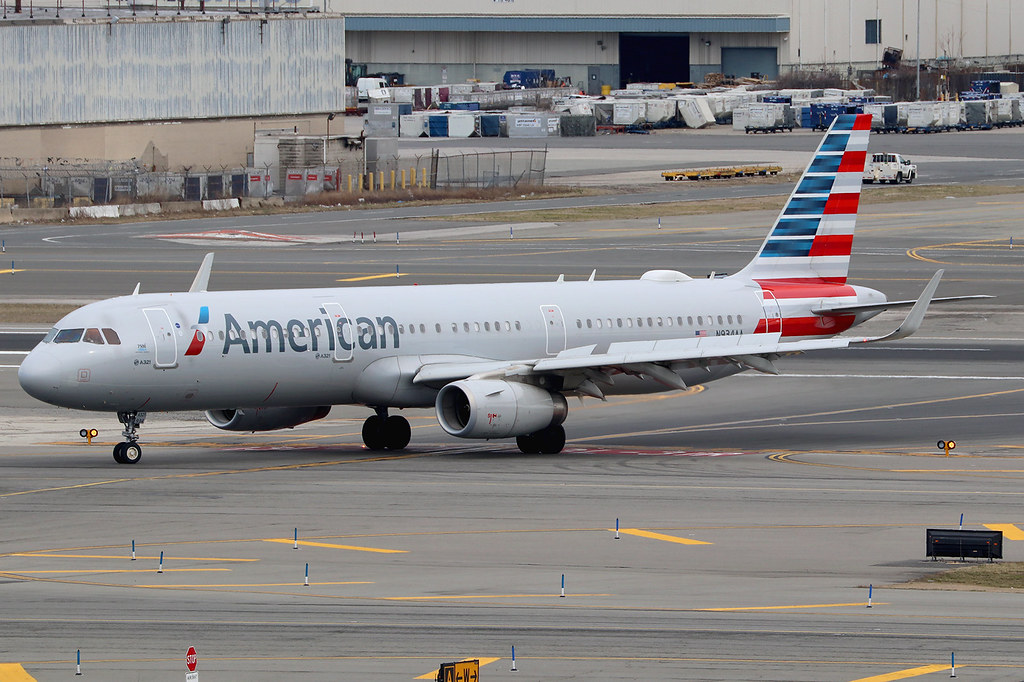

In [ ]:
from IPython.display import Image
Image(filename='/content/32516288777_d6cee3c9f5_b.jpg')


# AIRLINE DATASET ANALYSIS

In [1]:
pip install pyspark       # importing library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 32 kB/s 
     |████████████████████████████████| 198 kB 41.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=0d6b49d1e47e30d338d94972f01a866cc2b241c0110b190934ce3d0e240fbc5f
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [2]:
# here i am importing spark context and spark conf and giving name to it.
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("sampleapp")
sc = SparkContext(conf=conf)

In [3]:
# here i am calling sparkcontext.
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate().getOrCreate()
spark = SparkSession(sc)

In [4]:
# dataset of airline.
df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/Airline_data.csv")


## 1.) Show a sample of 5 records from dataset.

In [5]:
df.limit(5).show()        # 5 sample record of the dataset.

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1989|    1|        23|        1|   1419|      1230|   1742|      1552|           UA|      183

## 2.) Read the data with data types.

In [6]:
df.dtypes       # finding data type.

[('Year', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('DepTime', 'int'),
 ('CRSDepTime', 'int'),
 ('ArrTime', 'int'),
 ('CRSArrTime', 'int'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'int'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'int'),
 ('CRSElapsedTime', 'int'),
 ('AirTime', 'string'),
 ('ArrDelay', 'int'),
 ('DepDelay', 'int'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'int'),
 ('TaxiIn', 'string'),
 ('TaxiOut', 'string'),
 ('Cancelled', 'int'),
 ('CancellationCode', 'string'),
 ('Diverted', 'int'),
 ('CarrierDelay', 'string'),
 ('WeatherDelay', 'string'),
 ('NASDelay', 'string'),
 ('SecurityDelay', 'string'),
 ('LateAircraftDelay', 'string')]

## 3.) Make a new column MonthStr, Which has months in form of 01, 02, 03, ..., 12.

In [7]:
from pyspark.sql.functions import lit       # importing lit to add column.

In [8]:
df.withColumn("MonthStr",lit(None))         # here i am making a new month column which name is "MonthStr".

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: int, CRSDepTime: int, ArrTime: int, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: int, CRSElapsedTime: int, AirTime: string, ArrDelay: int, DepDelay: int, Origin: string, Dest: string, Distance: int, TaxiIn: string, TaxiOut: string, Cancelled: int, CancellationCode: string, Diverted: int, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string, MonthStr: void]

In [9]:
# filling the month value in "MonthStr" column.
# i taken  "day of week" column and put a condition in it.
 
from pyspark.sql.functions import when
df.withColumn("MonthStr", when((df.DayOfWeek<=1), lit("01")) .when((df.DayOfWeek<=2), lit("02")) .when((df.DayOfWeek<=3), lit("03")) .when((df.DayOfWeek<=4), lit("04")) .when((df.DayOfWeek<=5), lit("05")) .when((df.DayOfWeek<=6), lit("06")) .otherwise(lit("08"))).show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+--------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|MonthStr|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+--------+
|1989|    1|        23|        1|   1419|      1230|   1742|      1

## 4.) Find the # of flights each airline made.

In [62]:
from itertools import count                           # count library
from pyspark.sql.functions import countDistinct       # countdistinct library
from pyspark.sql import functions as F                # calling function F
df.groupby("Origin").agg(F.count("UniqueCarrier")).show()       # here i have found origin and count of evry uniquecarrier made.

+------+--------------------+
|Origin|count(UniqueCarrier)|
+------+--------------------+
|   LIH|                  30|
|   HNL|                 124|
|   EWR|                  24|
|   DEN|                  30|
|   IAD|                  30|
|   SFO|                 130|
|   PHL|                  29|
|   OGG|                  29|
+------+--------------------+



## 5.) Find the mean Arrival Delay per origination airport.

In [13]:
# importing F function.
from pyspark.sql import functions as F

# here i am finding Origin with average delay by the help of group by function.
df2 = df.groupBy("Origin").avg("ArrDelay")
df2.show()

+------+-------------------+
|Origin|      avg(ArrDelay)|
+------+-------------------+
|   LIH|0.16666666666666666|
|   HNL|  14.21774193548387|
|   EWR|               9.25|
|   DEN| 20.166666666666668|
|   IAD| 12.966666666666667|
|   SFO| 11.215384615384615|
|   PHL|  6.827586206896552|
|   OGG|  16.24137931034483|
+------+-------------------+



## 6.) What is the average departure delay from each airport?

In [14]:
# here i am taken origin and finding avg "DepDelay" by usin a function of groupby.

df3 = df.groupBy("Origin").avg("DepDelay")
df3.show()

+------+-------------------+
|Origin|      avg(DepDelay)|
+------+-------------------+
|   LIH|-3.7666666666666666|
|   HNL|  3.217741935483871|
|   EWR|  4.958333333333333|
|   DEN|               27.6|
|   IAD|                8.9|
|   SFO| 19.646153846153847|
|   PHL| 16.137931034482758|
|   OGG|                6.0|
+------+-------------------+

